In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from copy import deepcopy
from datetime import datetime
start_time = datetime.now()

In [78]:
data = pd.read_csv('NY property data.csv', index_col = 0)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [79]:
num_cols = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', \
            'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']
cat_cols = ['BBLE', 'B', 'BLOCK', 'LOT','BLDGCL','TAXCLASS', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'EXCD1', 'STADDR', 'ZIP',\
            'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

In [80]:
data.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [81]:
selected_cols = ['BBLE', 'B', 'BLOCK', 'LOT','TAXCLASS','BLDGCL','LTFRONT', 'LTDEPTH', 'BLDFRONT', 'BLDDEPTH', 'FULLVAL',\
             'AVLAND','AVTOT','ZIP','STORIES']

In [82]:
data1 = data[selected_cols]
data1.head()

,BBLE,B,BLOCK,LOT,TAXCLASS,BLDGCL,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,FULLVAL,AVLAND,AVTOT,ZIP,STORIES
RECORD,,,,,,,,,,,,,,,
1,1000010101,1,1,101,4,P7,500,1046,0,0,21400000.0,4225500.0,9630000.0,10004.0,NaN
2,1000010201,1,1,201,4,Z9,27,0,0,0,193800000.0,14310000.0,87210000.0,10004.0,NaN
3,1000020001,1,2,1,4,Y7,709,564,709,564,104686000.0,39008700.0,47108700.0,10004.0,3.0
4,1000020023,1,2,23,4,T2,793,551,85,551,39200000.0,15255000.0,17640000.0,10004.0,2.0
5,1000030001,1,3,1,4,Q1,323,1260,89,57,272300000.0,121050000.0,122535000.0,10004.0,1.0


In [83]:
pd.options.mode.chained_assignment = None

In [84]:
data1['BLOCK'] = data1['BLOCK'].astype('category')
data1['BLDGCL'] = data1['BLDGCL'].astype('category')
data1['LOT'] = data1['LOT'].astype('category')
data1['B'] = data1['B'].astype('category')
data1.replace(0, np.nan, inplace=True)

In [85]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 1 to 1070994
Data columns (total 15 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   BBLE      1070994 non-null  object  
 1   B         1070994 non-null  category
 2   BLOCK     1070994 non-null  category
 3   LOT       1070994 non-null  category
 4   TAXCLASS  1070994 non-null  object  
 5   BLDGCL    1070994 non-null  category
 6   LTFRONT   901886 non-null   float64 
 7   LTDEPTH   900866 non-null   float64 
 8   BLDFRONT  842179 non-null   float64 
 9   BLDDEPTH  842141 non-null   float64 
 10  FULLVAL   1057987 non-null  float64 
 11  AVLAND    1057985 non-null  float64 
 12  AVTOT     1057987 non-null  float64 
 13  ZIP       1041104 non-null  float64 
 14  STORIES   1014730 non-null  float64 
dtypes: category(4), float64(9), object(2)
memory usage: 106.3+ MB


# Handle Missing Values

In [86]:
# Fill NAs for 'ZIP'
data1['ZIP'] = data1.groupby(['B','BLOCK'])['ZIP'].transform(lambda x: x.fillna(x.median()))
data1['ZIP']=data1.groupby(['B'])['ZIP'].transform(lambda x: x.fillna(x.median()))


In [87]:
data1['ZIP'].isnull().sum()

0

In [88]:
# Fill NAs for property's values
property_values = ['FULLVAL','AVLAND','AVTOT']
for value in property_values:
    data1[value] = data1.groupby(['BLDGCL'])[value].transform(lambda x: x.fillna(x.median()) if len(x)>=30 else x)
    data1[value] = data1.groupby(['ZIP'])[value].transform(lambda x: x.fillna(x.median())if len(x)>=5 else x)
    data1[value] = data1.groupby(['BLOCK'])[value].transform(lambda x: x.fillna(x.median()))
    
    

In [89]:
data1[property_values].isnull().sum()

FULLVAL    0
AVLAND     0
AVTOT      0
dtype: int64

In [90]:
# Fill NAs for 'STORIES'
data1['STORIES'] = data1.groupby('BLDGCL')['STORIES'].transform(lambda x: x.fillna(x.median()))
data1['STORIES'] = data1.groupby('TAXCLASS')['STORIES'].transform(lambda x: x.fillna(x.median()))
data1['STORIES'] = data1.groupby('ZIP')['STORIES'].transform(lambda x: x.fillna(x.median()))


In [91]:
data1['STORIES'].isnull().sum()

0

In [92]:
quantile_list_avland = [0,0.25,0.5,0.75,0.95,1]
quantiles = data1['AVLAND'].quantile(quantile_list_avland).apply(lambda x: format(x, 'f'))
quantiles

0.00             1.000000
0.25          9456.000000
0.50         13784.000000
0.75         19903.000000
0.95        133200.000000
1.00    2668500000.000000
Name: AVLAND, dtype: object

In [93]:
quantile_label_avland = ['0-25Q', '25-50Q', '50-75Q', '75-95Q','95-100Q']
data1['AVLAND_QUANTILE_LABEL'] = pd.qcut(data1['AVLAND'], q=quantile_list_avland,\
                                         labels= quantile_label_avland)



In [94]:
data1['AVTOT'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95]).apply(lambda x: format(x, 'f'))

count       1070994.000000
mean         228796.190675
std         6877930.704529
min               1.000000
25%           18648.000000
50%           25602.000000
75%           46526.750000
90%          160397.000000
95%          409050.000000
max      4668308947.000000
Name: AVTOT, dtype: object

In [95]:
quantile_list_avtot = [0,0.25,0.5,0.75,0.95,1]
quantiles = data1['AVTOT'].quantile(quantile_list_avtot).apply(lambda x: format(x, 'f'))
quantiles

0.00             1.000000
0.25         18648.000000
0.50         25602.000000
0.75         46526.750000
0.95        409050.000000
1.00    4668308947.000000
Name: AVTOT, dtype: object

In [96]:
quantile_label_avtot = ['0-25Q', '25-50Q', '50-75Q', '75-95Q','95-100Q']
data1['AVTOT_QUANTILE_LABEL'] = pd.qcut(data1['AVTOT'], q=quantile_list_avtot,\
                                         labels= quantile_label_avtot)



In [97]:
# Fill NAs for land' dimensions 
land_dim = ['LTFRONT', 'LTDEPTH']
for dim in land_dim:
    data1[dim]= data1.groupby(['BLDGCL','AVLAND_QUANTILE_LABEL'])[dim].transform(lambda x: x.fillna(x.median()))
    data1[dim]= data1.groupby('TAXCLASS')[dim].transform(lambda x: x.fillna(x.median()))
data1[land_dim].isnull().sum()
    
    

LTFRONT    0
LTDEPTH    0
dtype: int64

In [98]:
# Fill NAs for properties' dimensions 
property_dim = ['BLDFRONT', 'BLDDEPTH']
for dim in property_dim:
    data1[dim]= data1.groupby(['BLDGCL','AVTOT_QUANTILE_LABEL'])[dim].transform(lambda x: x.fillna(x.median()))
    data1[dim]= data1.groupby('TAXCLASS')[dim].transform(lambda x: x.fillna(x.median()))
data1[property_dim].isnull().sum()

BLDFRONT    0
BLDDEPTH    0
dtype: int64

# Create New Features

Create these 3 sizes: 
1. lotarea = LTFRONT * LTDEPTH
2. bldarea = BLDFRONT * BLDDEPTH
3. bldvol = bldarea * STORIES

In [99]:
data1['LOTAREA'] = data1['LTFRONT'] * data1['LTDEPTH']
data1['BLDAREA'] = data1['BLDFRONT'] * data1['BLDDEPTH']
data1['BLDVOL'] = data1['BLDAREA'] * data1['STORIES']

In [100]:
data1.columns

Index(['BBLE', 'B', 'BLOCK', 'LOT', 'TAXCLASS', 'BLDGCL', 'LTFRONT', 'LTDEPTH',
       'BLDFRONT', 'BLDDEPTH', 'FULLVAL', 'AVLAND', 'AVTOT', 'ZIP', 'STORIES',
       'AVLAND_QUANTILE_LABEL', 'AVTOT_QUANTILE_LABEL', 'LOTAREA', 'BLDAREA',
       'BLDVOL'],
      dtype='object')

In [101]:
data1['FULLVAL_LA'] = data1['FULLVAL'] / data1['LOTAREA']
data1['AVLAND_LA'] = data1['AVLAND'] / data1['LOTAREA']
data1['AVTOT_LA'] = data1['AVTOT'] / data1['LOTAREA']

In [102]:
data1['FULLVAL_BA'] = data1['FULLVAL'] / data1['BLDAREA']
data1['AVLAND_BA'] = data1['AVLAND'] / data1['BLDAREA']
data1['AVTOT_BA'] = data1['AVTOT'] / data1['BLDAREA']

In [103]:
data1['FULLVAL_BV'] = data1['FULLVAL'] / data1['BLDVOL']
data1['AVLAND_BV'] = data1['AVLAND'] / data1['BLDVOL']
data1['AVTOT_BV'] = data1['AVTOT'] / data1['BLDVOL']

In [104]:
data1['ZIP5']=data1['ZIP']//1
data1['ZIP3'] = data1['ZIP5'] // 100

In [105]:
col_scale = ['FULLVAL_LA','AVLAND_LA', 'AVTOT_LA', 'FULLVAL_BA', 'AVLAND_BA', \
                   'AVTOT_BA','FULLVAL_BV', 'AVLAND_BV', 'AVTOT_BV']
col_scaler = ['ZIP3','ZIP5','B','TAXCLASS']
for i in col_scale:
    for j in col_scaler:
        data1[i + '_groupby_'+j] = data1.groupby(j)[i].apply(lambda x: x/(x.mean()))

In [106]:
data1.head()

,BBLE,B,BLOCK,LOT,TAXCLASS,BLDGCL,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,...,FULLVAL_BV_groupby_B,FULLVAL_BV_groupby_TAXCLASS,AVLAND_BV_groupby_ZIP3,AVLAND_BV_groupby_ZIP5,AVLAND_BV_groupby_B,AVLAND_BV_groupby_TAXCLASS,AVTOT_BV_groupby_ZIP3,AVTOT_BV_groupby_ZIP5,AVTOT_BV_groupby_B,AVTOT_BV_groupby_TAXCLASS
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,4,P7,500.0,1046.0,69.0,89.0,...,4.945162,2.334494,3.733862,2.152666,3.974893,1.279646,6.779256,3.510368,7.182107,2.320795
2,1000010201,1,1,201,4,Z9,27.0,178.0,45.0,70.0,...,305.574511,144.254470,86.281251,49.743315,91.850930,29.569772,418.907976,216.914815,443.801164,143.408014
3,1000020001,1,2,1,4,Y7,709.0,564.0,709.0,564.0,...,0.433427,0.204611,0.617593,0.356058,0.657460,0.211658,0.594179,0.307672,0.629488,0.203410
4,1000020023,1,2,23,4,T2,793.0,551.0,85.0,551.0,...,2.078545,0.981232,3.093136,1.783271,3.292806,1.060060,2.849449,1.475474,3.018775,0.975474
5,1000030001,1,3,1,4,Q1,323.0,1260.0,89.0,57.0,...,266.597876,125.854526,453.197268,261.279642,482.452330,155.316943,365.475433,189.246900,387.193446,125.116038


In [107]:
data1.shape

(1070994, 67)

In [108]:
columns_drop = ['FULLVAL',
 'AVLAND',
 'AVTOT',
 'LTFRONT',
 'LTDEPTH',
 'BLDFRONT',
 'BLDDEPTH',
 'STORIES',
 'ZIP',
 'TAXCLASS',
 'B',
 'BLOCK',
 'BLDGCL',
 'LOTAREA',
 'BLDAREA',
 'BLDVOL',
 'ZIP3',
 'ZIP5','AVTOT_QUANTILE_LABEL','AVLAND_QUANTILE_LABEL']

In [109]:
data2 = data1.drop(columns_drop,axis = 1)
data2.shape

(1070994, 47)

#  Dimensionality Reduction

In [110]:
cols_all = list(data2.columns.values)

In [111]:
cols_all.pop(0)

'BBLE'

In [112]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data2[cols_all]), columns = cols_all, index=range(1,1070995))

In [113]:
scaled_df['BBLE'] = data2['BBLE']

In [114]:
scaled_df.set_index('BBLE', inplace=True)

In [115]:
scaled_df.head()

,LOT,FULLVAL_LA,AVLAND_LA,AVTOT_LA,FULLVAL_BA,AVLAND_BA,AVTOT_BA,FULLVAL_BV,AVLAND_BV,AVTOT_BV,...,FULLVAL_BV_groupby_B,FULLVAL_BV_groupby_TAXCLASS,AVLAND_BV_groupby_ZIP3,AVLAND_BV_groupby_ZIP5,AVLAND_BV_groupby_B,AVLAND_BV_groupby_TAXCLASS,AVTOT_BV_groupby_ZIP3,AVTOT_BV_groupby_ZIP5,AVTOT_BV_groupby_B,AVTOT_BV_groupby_TAXCLASS
BBLE,,,,,,,,,,,,,,,,,,,,,
1000010101,-0.309092,-0.163214,-0.011934,-0.029716,0.274613,0.165498,0.341904,0.088259,0.050841,0.117211,...,0.104766,0.016806,0.034170,0.047969,0.033495,0.002043,0.091540,0.128116,0.090548,0.015916
1000010201,-0.191889,38.814236,17.678816,84.786983,5.777996,1.149350,6.296484,7.554542,1.322387,7.802531,...,8.088173,1.804123,1.065905,2.028495,1.022900,0.208690,6.619386,11.019156,6.485641,1.716053
1000020001,-0.426296,0.050502,0.521107,0.435341,-0.030996,0.014778,0.011239,-0.023792,0.002839,0.001873,...,-0.015046,-0.010017,-0.004780,-0.026798,-0.003857,-0.005758,-0.006428,-0.035333,-0.005427,-0.009599
1000020023,-0.400511,-0.116000,0.147930,0.073024,0.023544,0.073012,0.070251,0.017065,0.040972,0.043929,...,0.028641,-0.000236,0.026161,0.032596,0.025815,0.000439,0.029294,0.024266,0.029569,-0.000296
1000030001,-0.426296,0.444575,1.711926,1.292859,5.033881,6.080067,5.491362,6.586537,6.974298,6.806128,...,7.053123,1.572397,5.651881,10.831762,5.420720,1.127218,5.773050,9.607132,5.656517,1.495630


Text(0, 0.5, 'Cumulative explained variance')

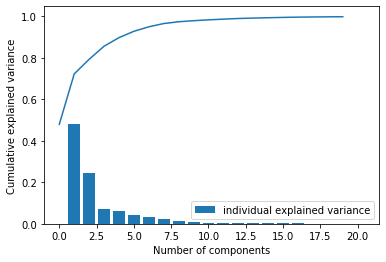

In [116]:
from sklearn.decomposition import PCA
npc=20
pca = PCA(n_components=npc)
principalComponents = pca.fit_transform(scaled_df[cols_all].values)
pca.get_covariance()
explained_variance=pca.explained_variance_ratio_
X=list(range(1,npc+1))
plt.bar(X,explained_variance,label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [117]:
npc=8
pca = PCA(n_components=npc)
principalComponents = pca.fit_transform(scaled_df.values)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 
                          'principal component 2', 
                          'principal component 3', 
                          'principal component 4', 
                          'principal component 5', 
                          'principal component 6', 
                          'principal component 7', 
                          'principal component 8'],index=scaled_df.index)
pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
BBLE,,,,,,,,
1000010101,0.726501,-0.511572,-0.051616,-0.305595,-0.388663,0.323920,-0.316509,0.194327
1000010201,44.471613,77.817751,12.833498,15.442605,-10.939726,-0.402134,-1.057801,23.942833
1000020001,0.017106,0.364319,-0.024578,-0.190784,0.214398,0.051897,-0.430258,-0.036724
1000020023,0.130807,-0.208701,-0.051272,-0.217118,0.030089,0.015496,-0.402552,-0.038677
1000030001,30.976620,-4.097908,-0.698983,-4.734614,-10.335915,-7.913787,-1.001626,9.108582


In [118]:
scaled_pca_df = pd.DataFrame(scaler.fit_transform(pca_df),columns = pca_df.columns.values,index=scaled_df.index)
scaled_pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
BBLE,,,,,,,,
1000010101,0.154717,-0.153134,-0.028709,-0.179348,-0.281796,0.273649,-0.316493,0.229120
1000010201,9.470759,23.293946,7.138130,9.062985,-7.931729,-0.339725,-1.057748,28.229593
1000020001,0.003643,0.109055,-0.013671,-0.111967,0.155447,0.043843,-0.430236,-0.043300
1000020023,0.027857,-0.062473,-0.028518,-0.127423,0.021815,0.013091,-0.402531,-0.045602
1000030001,6.596840,-1.226667,-0.388782,-2.778659,-7.493943,-6.685605,-1.001575,10.739396


# Fraud Algorithm

## Heuristic Function

In [119]:
n = 2
pca_cols = list(scaled_pca_df.columns)
scaled_pca_df['zscore'] = 0
for col in pca_cols:
    scaled_pca_df['zscore'] += (scaled_pca_df[col])**n
scaled_pca_df['zscore'] = (scaled_pca_df['zscore'])**(1/n)
scaled_pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,zscore
BBLE,,,,,,,,,
1000010101,0.154717,-0.153134,-0.028709,-0.179348,-0.281796,0.273649,-0.316493,0.229120,0.622361
1000010201,9.470759,23.293946,7.138130,9.062985,-7.931729,-0.339725,-1.057748,28.229593,40.329273
1000020001,0.003643,0.109055,-0.013671,-0.111967,0.155447,0.043843,-0.430236,-0.043300,0.487538
1000020023,0.027857,-0.062473,-0.028518,-0.127423,0.021815,0.013091,-0.402531,-0.045602,0.431841
1000030001,6.596840,-1.226667,-0.388782,-2.778659,-7.493943,-6.685605,-1.001575,10.739396,16.434396


## Autoencoder

In [120]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [121]:
input_dim  = 8
encoding_dim = 4
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [123]:
nb_epoch = 1
#batch_size = 
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(scaled_pca_df[pca_cols], scaled_pca_df[pca_cols],
                    epochs=nb_epoch,
                    shuffle=True,
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history
predictions = autoencoder.predict(scaled_pca_df[pca_cols])

33469/33469 [==============================] - 18s 525us/step - loss: 0.8951 - accuracy: 0.2669


In [124]:
autoencoded_data = pd.DataFrame(predictions,columns=['enPC1','enPC2','enPC3','enPC4','enPC5','enPC6','enPC7','enPC8'])
autoencoded_data.head()

,enPC1,enPC2,enPC3,enPC4,enPC5,enPC6,enPC7,enPC8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.676252,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [133]:
for i in range(8):
    scaled_pca_df['diff_'+ str(i+1)] = abs(autoencoded_data.iloc[:,i].values - scaled_pca_df.iloc[:,i].values)
    
    

In [135]:
scaled_pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,zscore,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8
BBLE,,,,,,,,,,,,,,,,,
1000010101,0.154717,-0.153134,-0.028709,-0.179348,-0.281796,0.273649,-0.316493,0.229120,0.622361,0.154717,0.153134,0.028709,0.179348,0.281796,0.273649,0.316493,0.229120
1000010201,9.470759,23.293946,7.138130,9.062985,-7.931729,-0.339725,-1.057748,28.229593,40.329273,9.470759,23.293946,7.138130,9.062985,7.931729,0.339725,1.734000,28.229593
1000020001,0.003643,0.109055,-0.013671,-0.111967,0.155447,0.043843,-0.430236,-0.043300,0.487538,0.003643,0.109055,0.013671,0.111967,0.155447,0.043843,0.430236,0.043300
1000020023,0.027857,-0.062473,-0.028518,-0.127423,0.021815,0.013091,-0.402531,-0.045602,0.431841,0.027857,0.062473,0.028518,0.127423,0.021815,0.013091,0.402531,0.045602
1000030001,6.596840,-1.226667,-0.388782,-2.778659,-7.493943,-6.685605,-1.001575,10.739396,16.434396,6.596840,1.226667,0.388782,2.778659,7.493943,6.685605,1.001575,10.739396


In [138]:
diff_cols = list(scaled_pca_df.columns[9:])

In [141]:
scaled_pca_df['autoencoder_score'] = 0
for col in diff_cols:
    scaled_pca_df['autoencoder_score'] += (scaled_pca_df[col])**n
scaled_pca_df['autoencoder_score'] = (scaled_pca_df['autoencoder_score'])**(1/n)
scaled_pca_df.head(20)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,zscore,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,autoencoder_score
BBLE,,,,,,,,,,,,,,,,,,
1000010101,0.154717,-0.153134,-0.028709,-0.179348,-0.281796,0.273649,-0.316493,0.229120,0.622361,0.154717,0.153134,0.028709,0.179348,0.281796,0.273649,0.316493,0.229120,0.622361
1000010201,9.470759,23.293946,7.138130,9.062985,-7.931729,-0.339725,-1.057748,28.229593,40.329273,9.470759,23.293946,7.138130,9.062985,7.931729,0.339725,1.734000,28.229593,40.352673
1000020001,0.003643,0.109055,-0.013671,-0.111967,0.155447,0.043843,-0.430236,-0.043300,0.487538,0.003643,0.109055,0.013671,0.111967,0.155447,0.043843,0.430236,0.043300,0.487538
1000020023,0.027857,-0.062473,-0.028518,-0.127423,0.021815,0.013091,-0.402531,-0.045602,0.431841,0.027857,0.062473,0.028518,0.127423,0.021815,0.013091,0.402531,0.045602,0.431841
1000030001,6.596840,-1.226667,-0.388782,-2.778659,-7.493943,-6.685605,-1.001575,10.739396,16.434396,6.596840,1.226667,0.388782,2.778659,7.493943,6.685605,1.001575,10.739396,16.434396
1000030002,1.535215,-0.262575,-0.112097,-0.742932,-1.637175,-1.574879,-0.560969,2.429151,3.790302,1.535215,0.262575,0.112097,0.742932,1.637175,1.574879,0.560969,2.429151,3.790302
1000030003,3.380129,-0.922553,-0.232089,-1.468713,-3.960670,-3.564018,-0.710787,5.345914,8.482954,3.380129,0.922553,0.232089,1.468713,3.960670,3.564018,0.710787,5.345914,8.482954
1000030010,0.257419,0.227383,-0.037227,-0.244539,-0.152378,0.233974,-0.421561,0.244541,0.703299,0.257419,0.227383,0.037227,0.244539,0.152378,0.233974,0.421561,0.244541,0.703299
1000041001,-0.023572,0.008547,-0.005507,-0.072283,0.128743,0.030663,0.739766,0.036897,0.756316,0.023572,0.008547,0.005507,0.072283,0.128743,0.030663,0.016399,0.036897,0.158206


In [147]:
fraud_score_rank = scaled_pca_df[['zscore','autoencoder_score']]

In [178]:
fraud_score_rank['zscore_rank'] = fraud_score_rank['zscore'].rank(ascending = True)
fraud_score_rank['autoencoder_rank'] = fraud_score_rank['autoencoder_score'].rank(ascending= True)
fraud_score_rank.head()

,zscore,autoencoder_score,zscore_rank,autoencoder_rank,final_score,final_rank
BBLE,,,,,,
4018420001,1021.351619,1021.373835,1070994.0,1070994.0,1021.358284,1070994.0
1011110001,1014.719599,1014.727347,1070993.0,1070993.0,1014.721924,1070993.0
3085900700,943.906348,943.915627,1070992.0,1070992.0,943.909132,1070992.0
5078530085,877.513243,877.475926,1070991.0,1070991.0,877.502048,1070991.0
4004200001,688.284245,688.202292,1070990.0,1070990.0,688.259659,1070990.0


In [185]:
fraud_score_rank['final_score'] = fraud_score_rank['zscore']+fraud_score_rank['autoencoder_score']
fraud_score_rank['final_rank'] = round(0.7 * fraud_score_rank['zscore_rank'] + 0.4 * fraud_score_rank['autoencoder_rank'])
fraud_score_rank = fraud_score_rank.sort_values(by = ['final_rank'],ascending = False)


In [186]:
fraud_score_rank.head()

,zscore,autoencoder_score,zscore_rank,autoencoder_rank,final_score,final_rank
BBLE,,,,,,
4018420001,1021.351619,1021.373835,1070994.0,1070994.0,2042.725454,1178093.0
1011110001,1014.719599,1014.727347,1070993.0,1070993.0,2029.446946,1178092.0
3085900700,943.906348,943.915627,1070992.0,1070992.0,1887.821975,1178091.0
5078530085,877.513243,877.475926,1070991.0,1070991.0,1754.989169,1178090.0
4004200001,688.284245,688.202292,1070990.0,1070990.0,1376.486537,1178089.0
